In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [99]:
bank=pd.read_csv("bank-full.csv",sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [100]:
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [101]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [102]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [103]:
bank.info

<bound method DataFrame.info of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  d

In [104]:
bank.describe

<bound method NDFrame.describe of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact 

In [105]:
bank.shape


(45211, 17)

In [106]:
bank=bank.dropna()
bank.shape

(45211, 17)

In [107]:
columns=['age','balance','duration','campaign','y']
bank_sel=bank[columns]
bank_sel.info

<bound method DataFrame.info of        age  balance  duration  campaign    y
0       58     2143       261         1   no
1       44       29       151         1   no
2       33        2        76         1   no
3       47     1506        92         1   no
4       33        1       198         1   no
...    ...      ...       ...       ...  ...
45206   51      825       977         3  yes
45207   71     1729       456         2  yes
45208   72     5715      1127         5  yes
45209   57      668       508         4   no
45210   37     2971       361         2   no

[45211 rows x 5 columns]>

<AxesSubplot:xlabel='age'>

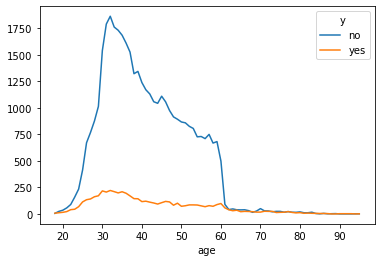

In [108]:
pd.crosstab(bank_sel.age,bank_sel.y).plot(kind="line")

<AxesSubplot:>

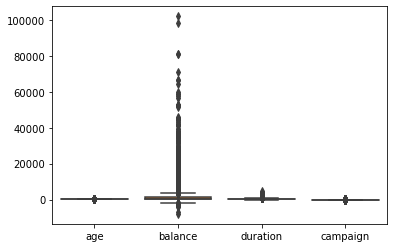

In [109]:
sns.boxplot(data =bank_sel,orient = "v")

In [110]:
bank_sel['outcome'] = bank_sel.y.map({'no':0, 'yes':1})
bank_sel.tail(10)

<ipython-input-110-936c0710b4ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_sel['outcome'] = bank_sel.y.map({'no':0, 'yes':1})


,age,balance,duration,campaign,y,outcome
45201,53,583,226,1,yes,1
45202,34,557,224,1,yes,1
45203,23,113,266,1,yes,1
45204,73,2850,300,1,yes,1
45205,25,505,386,2,yes,1
45206,51,825,977,3,yes,1
45207,71,1729,456,2,yes,1
45208,72,5715,1127,5,yes,1
45209,57,668,508,4,no,0
45210,37,2971,361,2,no,0


<AxesSubplot:xlabel='age', ylabel='count'>

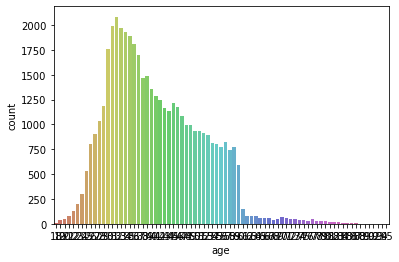

In [111]:
sns.countplot(x="age",data=bank,palette='hls')

<AxesSubplot:title={'center':'age'}, xlabel='outcome'>

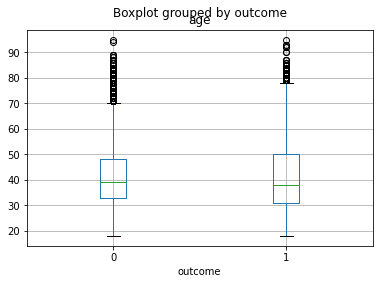

In [112]:
bank_sel.boxplot(column='age', by='outcome')


In [113]:
feature_col=['age','balance','duration','campaign']
output_target=['outcome']
X = bank_sel[feature_col]
Y = bank_sel[output_target]

In [114]:
classifier = LogisticRegression()

In [115]:
classifier.fit(X,Y)

C:\Users\shrad\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [116]:
classifier.coef_ 

array([[ 7.69721526e-03,  3.72191064e-05,  3.54908897e-03,
        -1.39828304e-01]])

In [117]:
classifier.predict_proba (X)

array([[0.8736739 , 0.1263261 ],
       [0.92488732, 0.07511268],
       [0.9459632 , 0.0540368 ],
       ...,
       [0.30553764, 0.69446236],
       [0.82336234, 0.17663766],
       [0.86407825, 0.13592175]])

In [118]:
y_pred = classifier.predict(X)

In [119]:
y_pred 

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [120]:
from sklearn.metrics import confusion_matrix

In [121]:
confusion_matrix = confusion_matrix(Y,y_pred)

In [122]:
print(confusion_matrix)

[[39342   580]
 [ 4435   854]]


In [123]:
import matplotlib.pyplot as plt

Text(0.5, 15.0, 'Predicted Label')

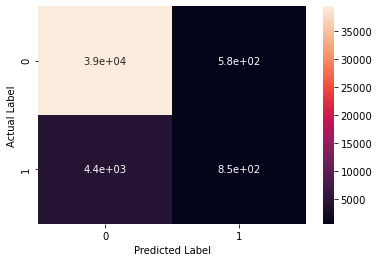

In [124]:
sns.heatmap(confusion_matrix, annot=True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')